
### Introduction:
I am a big fan on the [Quantified Self Movement](https://en.wikipedia.org/wiki/Quantified_self). Collecting and routinely analyzing my own personal data has enabled me with the ability to understand myself in a much more objective manner. I use a variety of applications and devices to track various data points about myself. In this post I attempt to analyze my sleep last month.

### Questions:
- What was my average sleep for the month?
- What was the distribution and variation in my sleep?
- What was the difference in sleep on weekdays versus weekends?
- What was the difference in sleep per day of the week?


In [35]:
%%capture
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
%matplotlib widget
import pandas_profiling
import datetime
import scipy
%matplotlib inline

In [36]:
#importing data from my health app using http://quantifiedself.com/qs-access-app/
sleep = pd.read_csv('data/sleep/Sleep Analysis Jan 2019.csv')

#converting date column into datetime
sleep['In bed start'] = pd.to_datetime(sleep['In bed start'])
sleep['In bed Finish'] = pd.to_datetime(sleep['In bed Finish'])

#setting the index to the date
sleep = sleep.set_index(pd.DatetimeIndex(sleep['In bed Finish']))

#ENTER THIS MONTH'S NUMBER HERE TO FILTER FOR THIS MONTH & Year
sleep = sleep[sleep.index.month.isin([1]) & sleep.index.year.isin([2019])]

#sleep = sleep.sort_values(['In bed Finish'], ascending=[True])

#getting only the columns I want
sleep = sleep.iloc[:,0:3]
sleep.head()

,In bed start,In bed Finish,Minutes in bed
In bed Finish,,,
2019-01-01 09:27:00,2019-01-01 02:17:00,2019-01-01 09:27:00,430.000000
2019-01-02 08:31:00,2019-01-02 01:21:00,2019-01-02 08:31:00,430.150632
2019-01-03 08:20:00,2019-01-03 00:03:00,2019-01-03 08:20:00,497.354967
2019-01-04 09:00:00,2019-01-04 02:16:00,2019-01-04 09:00:00,403.071597
2019-01-05 10:31:00,2019-01-05 02:17:00,2019-01-05 10:31:00,494.000000


In [37]:
sleep['Hours in Bed'] = sleep['Minutes in bed'] / 60.0
sleep['bedtime'] = sleep['In bed start'].dt.hour + sleep['In bed start'].dt.minute / 60.0

In [38]:
sleep.head()

,In bed start,In bed Finish,Minutes in bed,Hours in Bed,bedtime
In bed Finish,,,,,
2019-01-01 09:27:00,2019-01-01 02:17:00,2019-01-01 09:27:00,430.000000,7.166667,2.283333
2019-01-02 08:31:00,2019-01-02 01:21:00,2019-01-02 08:31:00,430.150632,7.169177,1.350000
2019-01-03 08:20:00,2019-01-03 00:03:00,2019-01-03 08:20:00,497.354967,8.289249,0.050000
2019-01-04 09:00:00,2019-01-04 02:16:00,2019-01-04 09:00:00,403.071597,6.717860,2.266667
2019-01-05 10:31:00,2019-01-05 02:17:00,2019-01-05 10:31:00,494.000000,8.233333,2.283333


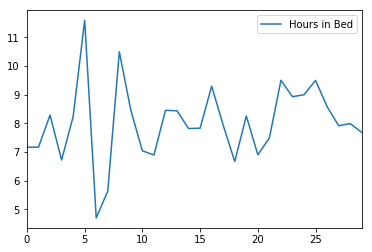

In [39]:
#https://github.com/tuchandra/sleep-analysis/blob/master/spring-sleep-analysis.ipynb

dates = sleep['In bed Finish']
time_in_bed = []

for i in sleep['Minutes in bed']:
    time_in_bed.append(i / 60.0)
        
df = pd.DataFrame(time_in_bed)
df.columns = ['Hours in Bed']


df.plot()

## What was my average sleep for the month? 
Almost exactly at 8 hours.

In [40]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours in Bed,30.0,8.019936,1.358089,4.69825,7.167294,7.961942,8.551076,11.6


## What was the distribution and variation in my sleep? 

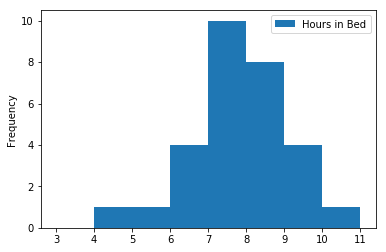

In [41]:
df.plot.hist(bins = 8, range = (3, 11))

## What was the difference in sleep on weekdays versus weekends?

In [42]:
sleep['day_of_week'] = sleep.index.weekday
sleep['day_type'] = sleep['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

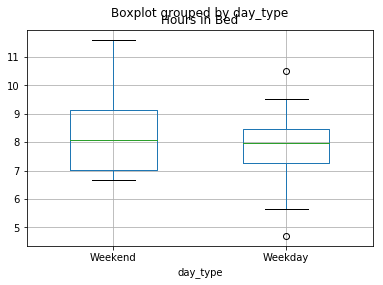

In [43]:
sleep.boxplot(column = 'Hours in Bed', by = 'day_type', positions = [2, 1], 
           vert = True, widths = 0.5)

## What was the difference in sleep per day of the week?

In [44]:
# Group dataframe by weekday vs. weekend

df_weekdays = sleep[sleep.day_of_week < 5]
df_weekend = sleep[sleep.day_of_week >= 5]

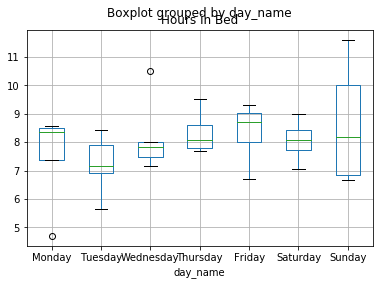

In [45]:
# Add a label for day name, to make the boxplot more readable
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 
        5: 'Saturday', 6: 'Sunday'}
sleep['day_name'] = sleep['day_of_week'].apply(lambda x: days[x])

sleep.boxplot(column = 'Hours in Bed', by = 'day_name', positions = [5, 1, 6, 7, 4, 2, 3], vert = True)

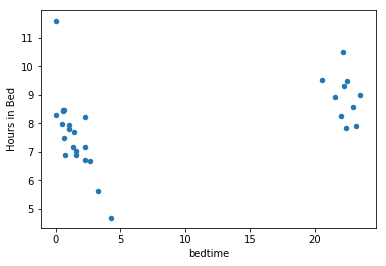

In [46]:
sleep.plot.scatter(x = 'bedtime', y = 'Hours in Bed' )

## Final Thoughts and Next Steps:

January was a really great month for me sleep wise. I have pretty poor sleep habits as you can see by the times. However, to average 8 hours a night for a whole month is a pretty big win for me. 